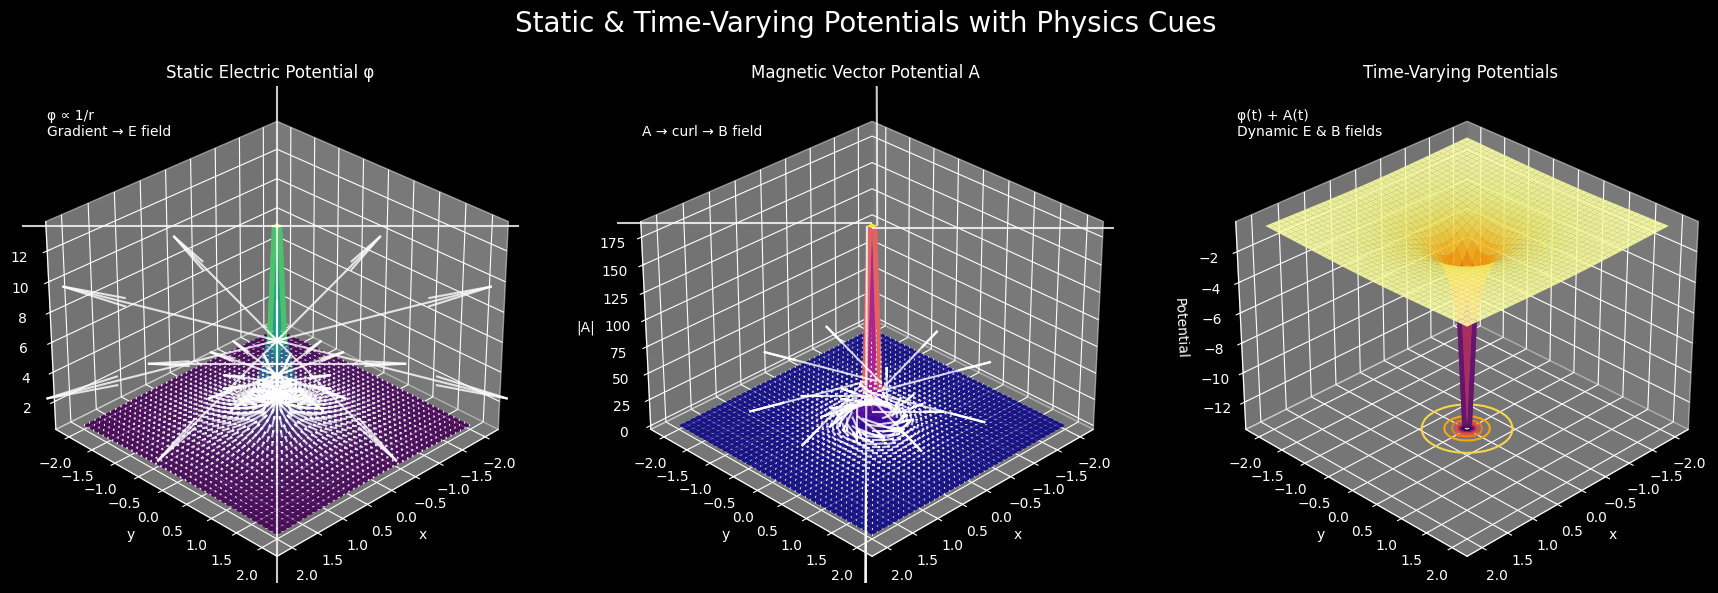

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('dark_background')
fig = plt.figure(figsize=(18, 6))
fig.suptitle("Static & Time-Varying Potentials with Physics Cues", fontsize=20, color='white')


x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2) + 1e-3
theta = np.arctan2(Y, X)


ax1 = fig.add_subplot(131, projection='3d')
phi = 1 / r
ax1.plot_surface(X, Y, phi, cmap='viridis', edgecolor='none', alpha=0.9)
ax1.contour(X, Y, phi, 10, zdir='z', offset=np.min(phi)-0.2, cmap='viridis', linewidths=1)
ax1.quiver(X, Y, phi, -X/r**3, -Y/r**3, np.zeros_like(phi), length=0.1, color='white', alpha=0.8)
ax1.set_title("Static Electric Potential φ", color='white')
ax1.text2D(0.05, 0.9, "φ ∝ 1/r\nGradient → E field", transform=ax1.transAxes, color='white')
ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('φ')
ax1.view_init(30, 45)


ax2 = fig.add_subplot(132, projection='3d')
A_magnitude = 1 / r**2
A_x = -A_magnitude * np.sin(theta)
A_y = A_magnitude * np.cos(theta)
A_mag = np.sqrt(A_x**2 + A_y**2)
ax2.plot_surface(X, Y, A_mag, cmap='plasma', edgecolor='none', alpha=0.9)
ax2.contour(X, Y, A_mag, 10, zdir='z', offset=np.min(A_mag)-0.1, cmap='plasma')
ax2.quiver(X, Y, A_mag, A_x, A_y, np.zeros_like(A_mag), length=0.05, color='white', alpha=0.8)
ax2.set_title("Magnetic Vector Potential A", color='white')
ax2.text2D(0.05, 0.9, "A → curl → B field", transform=ax2.transAxes, color='white')
ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('|A|')
ax2.view_init(30, 45)


ax3 = fig.add_subplot(133, projection='3d')
t = 0.5
phi_t = (1 / r) * np.cos(2*np.pi*t)
A_t_magnitude = (1 / r**2) * np.sin(2*np.pi*t)
A_tx = -A_t_magnitude * np.sin(theta)
A_ty = A_t_magnitude * np.cos(theta)
A_t_mag = np.sqrt(A_tx**2 + A_ty**2)
ax3.plot_surface(X, Y, phi_t + A_t_mag, cmap='inferno', edgecolor='none', alpha=0.9)
ax3.contour(X, Y, phi_t + A_t_mag, 10, zdir='z', offset=np.min(phi_t + A_t_mag)-0.2, cmap='inferno')
ax3.quiver(X, Y, phi_t + A_t_mag, A_tx, A_ty, np.zeros_like(A_t_mag), length=0.05, color='white', alpha=0.8)
ax3.set_title("Time-Varying Potentials", color='white')
ax3.text2D(0.05, 0.9, "φ(t) + A(t)\nDynamic E & B fields", transform=ax3.transAxes, color='white')
ax3.set_xlabel('x'); ax3.set_ylabel('y'); ax3.set_zlabel('Potential')
ax3.view_init(30, 45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("enhanced_potentials_visual.png", dpi=400, facecolor='black')
plt.show()
